In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Transformers (data preprocessor)
==============

Unsupervised transformations for preprocessing
--------------------------------------------------

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['DESCR', 'target', 'data', 'feature_names'])

In [3]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target)

In [4]:
np.set_printoptions(suppress=True)
print(X_train)

[[   0.01538   90.         3.75    ...,   15.9      386.34       3.11   ]
 [  15.1772     0.        18.1     ...,   20.2        9.32      26.45   ]
 [   0.35114    0.         7.38    ...,   19.6      396.9        7.7    ]
 ..., 
 [  15.8744     0.        18.1     ...,   20.2      396.9       21.08   ]
 [   4.26131    0.        18.1     ...,   20.2      390.74      12.67   ]
 [   0.35233    0.        21.89    ...,   21.2      394.08      14.59   ]]


In [5]:
print("mean : %s " % X_train.mean(axis=0))
print("standard deviation : %s " % X_train.std(axis=0))

mean : [   3.37999668   10.96306069   11.19543536    0.07387863    0.55269789
    6.27659894   68.32796834    3.75910897    9.37994723  404.85224274
   18.5005277   360.72295515   12.64501319] 
standard deviation : [   7.45598556   22.35044007    6.80158014    0.26157327    0.11280508
    0.69481183   28.660853      2.04339747    8.57056502  166.81764273
    2.1443919    84.39636397    7.09477906] 


# each columns has different mean

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [7]:
scaler.fit(X_train)
# unsupervised training for all train data with scaler object

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
X_scaled = scaler.transform(X_train)

In [9]:
print(X_train.shape)
print(X_scaled.shape)
print("\n Train transformed with same shape of data")

(379, 13)
(379, 13)

 Train transformed with same shape of data


In [10]:
print("mean : %s " % X_scaled.mean(axis=0))
print("standard deviation : %s " % X_scaled.std(axis=0))

mean : [-0. -0.  0.  0. -0.  0. -0.  0.  0. -0.  0.  0.  0.] 
standard deviation : [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.] 


In [11]:
X_scaled_test = scaler.transform(X_test)
print(X_test.shape)
print(X_scaled_test.shape)
print("mean : %s " % X_scaled_test.mean(axis=0))
print("standard deviation : %s " % X_scaled_test.std(axis=0))

(127, 13)
(127, 13)
mean : [ 0.114229    0.07140774 -0.03436011 -0.07172185  0.07053963  0.04607755
  0.03432706  0.07006419  0.07877787  0.08084481 -0.08359846 -0.19114486
  0.00452071] 
standard deviation : [ 1.51401644  1.15831345  1.02968868  0.87245404  1.09907566  1.03941157
  0.92219624  1.11115399  1.05609181  1.03422727  1.03125286  1.28116354
  1.02184114] 


Principal Component Analysis
=============================

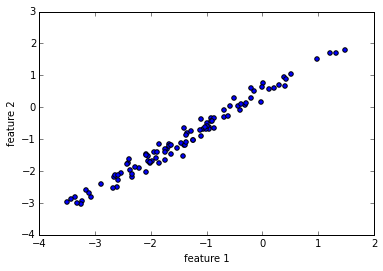

In [12]:
rnd = np.random.RandomState(42)
X_blob = np.dot(rnd.normal(size=(100, 2)), rnd.normal(size=(2, 2))) + rnd.normal(size=2)
plt.scatter(X_blob[:, 0], X_blob[:, 1])
plt.xlabel("feature 1")
plt.ylabel("feature 2")

In [13]:
from sklearn.decomposition import PCA
pca = PCA()

In [14]:
pca.fit(X_blob)

PCA(copy=True, n_components=None, whiten=False)

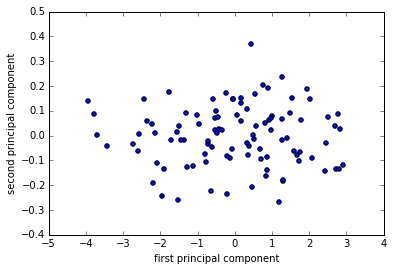

In [15]:
X_pca = pca.transform(X_blob)

plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel("first principal component")
plt.ylabel("second principal component")

PCA for dimensionality Reduction
---------------------------------

In [16]:
from sklearn.datasets import load_digits

digits = load_digits(n_class=5)
X, y = digits.data, digits.target
print(X.shape)

(901, 64)


In [17]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, n_components=2, whiten=False)

In [18]:
X_reduced = pca.transform(X)
print("Reduced dataset shape: %s" % (X_reduced.shape, ))

Reduced dataset shape: (901, 2)


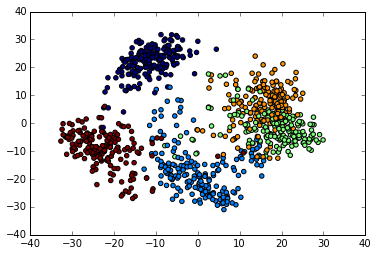

In [19]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y)